# Symbulate Documentation: Multiple Random Variables and Joint Distributions

<a id='contents'></a>

1. [**Introduction and installing Symbulate**](index.html)
1. [**Probability spaces**](probspace.html)
1. [**Simulation tools**](sim.html)
1. [**Random variables**](rv.html)
1. [**Commonly used probability models**](common.html)
1. [**Multiple random variables and joint distributions**](#joint)
  1. [**ampersand (&):**](#ampersand) Use **&** to simulate pairs (or tuples) of values 
  1. [**Plot:**](#plot) Use **.plot()** to display a scatterplot summary of the simulated values of two random variables.
  1. [**Random vectors:**](#rv)
  1. [**"Unpacking":**](#unpack)
  1. [**Marginal distributions:**](#marginal)
  1. [**Covariance:**](#cov) Use **.cov()** to compute the covariance between two random variables, or the covariance matrix for three or more random variables
  1. [**Correlation:**](#corr) Use **.cor()** to compute the correlation between two random variables, or the correlation matrix for three or more random variables
  1. [**Transformations:**](#transform)
1. [**Conditioning**](conditioning.html)
1. [**Random processes**](process.html)
1. [**Markov processes**](mc.html)

Instructions for downloading and installing Symbulate can be found [here](http://calpoly.edu/~dsun09/python.html).  During a session, be sure to import Symbulate using the following commands.
<a id='joint'></a>

In [1]:
from symbulate import *
%matplotlib inline

<a id='joint'></a>
[Back to contents](#contents)

## Multiple random variables

Many problems involve several random variables defined on the same probability space.  Of interest are properties of the *joint distribution* which describe the relationship between the random variables.

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls

In [2]:
die = list(range(1, 6+1))
P = BoxModel(die, size = 2)
X = RV(P, sum)
Y = RV(P, max)

Recall that a RV can be defined by specifying its distribution directly.  Independent RVs can be defined using the asterisk *.

*Example.* Let $X$, $Y$, and $Z$ be independent, with $X$ having a Binomial(5, 0.5) distribution, $Y$ a Normal(0,1) distribution, and $Z$ a Uniform(0,1) distribution 

In [3]:
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))  # see below for notes on "unpacking"

Several [joint distributions](common.html#joint) are built in to Symbulate.  For example, a [multivariate normal distribution](common.html#mvn) is a joint distribution parametrized by a mean vector and a covariance matrix.

In [4]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix)) # see below for notes on "unpacking"

Custom joint distributions can be specified using [ProbabilitySpace](probspace.html#probability_space).  For example, it is possible to [specify a joint distribution via conditional and marginal distributions](conditioning.html#conditional).

<a id='ampersand'></a>
[Back to contents](#contents)

### Ampersand (&)

Pairs of values of two random variables, or tuples of values of multiple random variables, can be simulated simultaneously using the ampersand **&**.  [Simulation tools](sim.html) like `.sim()`, `.tabulate()`, etc work as before.

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls

In [5]:
die = list(range(1, 6+1))
P = BoxModel(die, size = 2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).tabulate(normalize = True)

"(2, 1)",0.0288
"(3, 2)",0.0511
"(4, 2)",0.0272
"(4, 3)",0.0548
"(5, 3)",0.0577
"(5, 4)",0.0503
"(6, 3)",0.0292
"(6, 4)",0.0594
"(6, 5)",0.0541
"(7, 4)",0.0571
"(7, 5)",0.0568


In [6]:
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))  # see below for notes on "unpacking"
(X & Y & Z).sim(10000)

0,"(1, 1.2998813716621234, 0.30989064030015734)"
1,"(3, 0.631981530720729, 0.14757144567908353)"
2,"(1, 0.5712858834523258, 0.42521202582118545)"
3,"(1, 0.5420381755168137, 0.32091482022767404)"
4,"(2, -1.2919734278677537, 0.49919974761116626)"
5,"(3, 0.58275611380249, 0.19855886730413352)"
6,"(3, -1.8458657051505991, 0.4745686306945365)"
7,"(4, -0.7042158633834331, 0.9282993489920944)"
8,"(2, 0.9434962974771068, 0.6827511084569152)"
...,...
9999,"(1, -1.2081924819082634, 0.8148678484605815)"


<a id='plot'></a>
[Back to contents](#contents)

### Plot

Use `.plot()` to display a *scatterplot* summary of the simulated pairs of values of two random variables.  When the variables are discrete, it is recommended to use the `jitter = True` option.  The `alpha =` parameter controls the level of transparency.

*Example.* Let $X$ and $Y$ be independent N(0, 1) random variables.

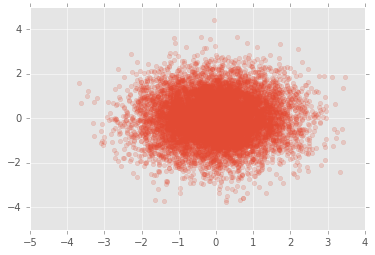

In [7]:
X, Y = RV(Normal(0,1)**2)
(X & Y).sim(10000).plot(alpha = 0.2)

*Example.*  Roll two fair six-sided dice.  Let $X$ be the sum of the two dice and $Y$ the larger of the two rolls

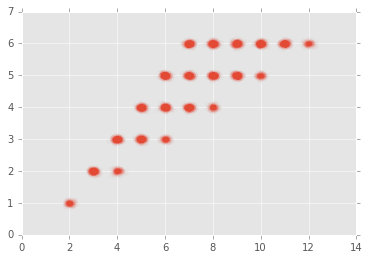

In [8]:
die = list(range(1, 6+1))
P = BoxModel(die, size = 2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).plot(jitter = True, alpha = 0.01)

Multiple scatterplots can be overlaid on the same plot.

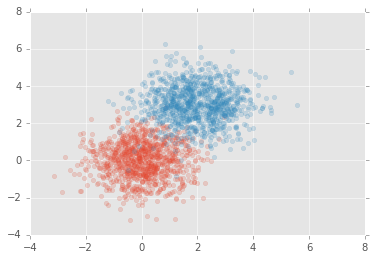

In [9]:
X, Y = RV(Normal(0,1)**2)
(X & Y).sim(1000).plot(alpha = 0.2)
((X+2) & (Y+3)).sim(1000).plot(alpha = 0.2)

<a id='rv'></a>
[Back to contents](#contents)

### Random vectors

A random variable maps an outcome in a probability space to a real number.  A *random vector* maps an outcome in a probability space to a vector of values.  For example, a roll of two dice could return the pair of values (sum of the rolls, larger of the rolls).  That is, each realization of a random vector is a tuple of values, rather than a single value. RV can be used to define random vectors as well and random variables.

In [10]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X.sim(3)

0,"(2, -0.017002540957784175)"
1,"(3, 0.5129802624203922)"
2,"(4, 0.4624198623135503)"


Components of a random vector X can be accessed using brackets `[]`.  Note that Python starts the index at 0, so the first entry of a vector `X` is `X[0]`, the second entry is `X[1]`, etc.  Each component of a random vector is a random variable so indexing using brackets produces a random variable which can be manipulated accordingly.

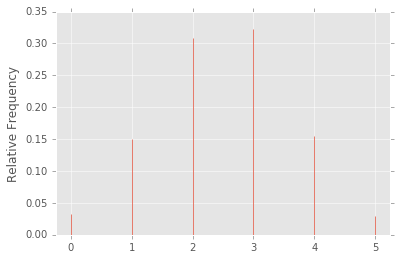

In [11]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X[0].sim(10000).plot()

Brackets can be used to access components of the random vector itself, or the simulated values of a random vector

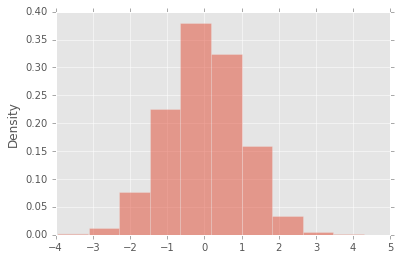

In [12]:
X = RV(Binomial(5, 0.5) * Normal(0, 1))
X.sim(10000)[1].plot()

<a id='unpack'></a>
[Back to contents](#contents)

### "Unpacking"

Individual components of a random vector X can be accessed using brackets, e.g. X[0], X[1], etc.  When a problem involves only a few random variables, it is typical to denote them as e.g. $X, Y, Z$ (rather than X[0], X[1], X[2]).  Components of a random vector can be "unpacked" in this way when defining an RV.

*Example.* Let $X$, $Y$, and $Z$ be independent, with $X$ having a Binomial(5, 0.5) distribution, $Y$ a Normal(0,1) distribution, and $Z$ a Uniform(0,1) distribution.  The following two cells provide two ways this situation can be defined.  The first version is the "unpacked" definition which defines the three random variables.  The second defines a random vector and then accesses its components with brackets. 

0,"(2, 0.5499515516546413, 0.9989574340276992)"
1,"(2, 0.4287254388693068, 0.4114856852806622)"
2,"(2, 1.861649483741809, 0.7493504455375983)"
3,"(2, 1.5306176016045432, 0.8571747084736437)"


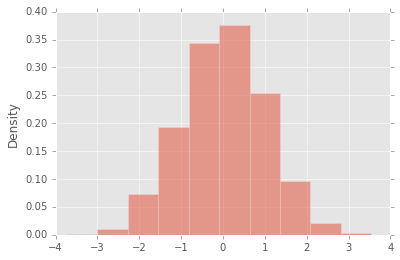

In [13]:
# unpacked version
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))
Y.sim(10000).plot()
(X & Y & Z).sim(4)

0,"(4, 0.20601355418232128, 0.2703931116800644)"
1,"(2, -0.7809850272891681, 0.006679771956026981)"
2,"(3, -0.055633568407519485, 0.6799108395335013)"
3,"(5, 1.7609392382105762, 0.7799490716898513)"


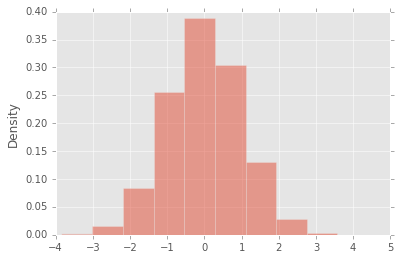

In [14]:
# vector version
X = RV(Binomial(5, 0.5) * Normal(0,1) * Uniform(0,1))
X[1].sim(10000).plot()
X.sim(4)

<a id='marginal'></a>
[Back to contents](#contents)

### Marginal distributions

Each component of a random vector is a random variable, so indexing using brackets or unpacking produces a random variable which can be manipulated accordingly.

When multiple random variables are simulated, applying `.mean()`, `.var()`, or `.sd()` returns the marginal means, variances, and standard deviations, respectively, of each of the random variables involved.

*Example.*  A vector of independent random variables.

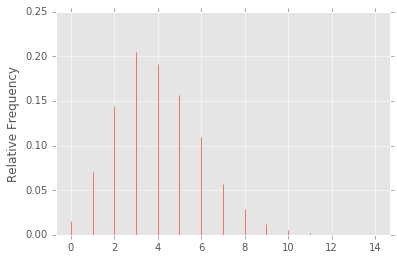

In [15]:
X = RV(Binomial(5, 0.5) * Normal(0, 1) * Poisson(4))
X[2].sim(10000).plot()

In [16]:
X.sim(10000).mean()

(2.4870000000000001, 0.011795693512085946, 4.0145999999999997)

In [17]:
X.sim(10000).sd()

(1.1097747474149739, 1.0007219976118362, 1.9826959398758326)

*Example.* A [multivariate normal](common.html#mvn) example, with "unpacking".

In [18]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix))
xy = (X & Y).sim(10000)
xy.mean()

(0.0025984735611870027, 0.96512816277784619)

In [19]:
xy.var()

(1.0072099951633284, 4.0012748448466642)

<a id='cov'></a>
[Back to contents](#contents)

### Covariance

The covariance between random variables $X$ and $Y$, defined as
$$
Cov(X,Y) = E[(X-E(X))(Y-E(Y))],
$$
measures the degree of linear dependence between $X$ and $Y$.  Covariance can be approximated by simulating many pairs of values of the random variables and using `.cov()`.

*Example.*  Let $X$ be the minimum and $Y$ the maximum of two independent Uniform(0,1) random variables.  It can be shown that $Cov(X,Y) = 1/36$ (and the correlation is 1/2).

0.027101491072002493

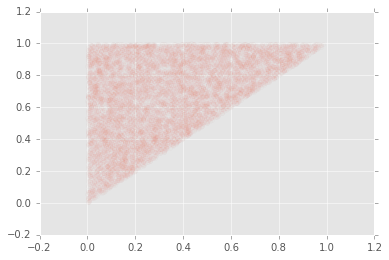

In [20]:
P = Uniform(a = 0, b = 1)**2
X = RV(P, min)
Y = RV(P, max)
xy = (X & Y).sim(10000)
plot(xy, alpha = 0.01)
xy.cov()

*Example.* A [multivariate normal](common.html#mvn) example.

In [21]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix)) # see below for notes on "unpacking"
xy = (X & Y).sim(10000)
xy.cov()

-0.49833921369060624

When simulating more than two random variables, applying .cov() returns the covariance matrix of covariances between each pair of values (with the variances on the diagonal).

In [22]:
(X & Y & X+Y).sim(10000).cov()

array([[ 0.97457517, -0.49987171,  0.47470346],
       [-0.49987171,  4.01975999,  3.51988829],
       [ 0.47470346,  3.51988829,  3.99459175]])

<a id='corr'></a>
[Back to contents](#contents)

### Correlation

The **correlation coefficient** is a standardized measure of linear dependence which takes values in $[-1, 1]$.
$$
Corr(X,Y) = \frac{Cov (X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y}} = Cov\left(\frac{X - E(X)}{SD(X)},\frac{Y - E(Y)}{SD(Y)}\right)
$$
The correlation coefficient can be approximated by simulating many pairs of values and  using `.corr()`.

*Example.* A [bivariate normal](common.html#mvn) example.

In [23]:
X, Y = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = -0.25 ))
xy = (X & Y).sim(10000)
xy.corr()

-0.24625703414267275

When simulating more than two random variables, applying `.corr()` returns the correlation *matrix* of correlations between each pair of values (with 1s on the diagonal since a variable is perfectly correlated with itself).

In [24]:
(X & Y & X+Y).sim(10000).corr()

array([[ 1.        , -0.25759281,  0.25291357],
       [-0.25759281,  1.        ,  0.86969086],
       [ 0.25291357,  0.86969086,  1.        ]])

<a id='transform'></a>
[Back to contents](#contents)

### Transformations of random variables

Random variables are often defined as functions of other random variables.  In particular, arithmetic operations like addition, subtraction, multiplication, and division can be applied to random variables defined on the same probability space.

*Example.* Two soccer teams score goals independently of each other, team A according to a Poisson distribution with mean 2.3 goals per goal and team B according to a Poisson distribution with mean 1.7 goals per game.  Approximate the distribution of the total number of goals scored in a game.

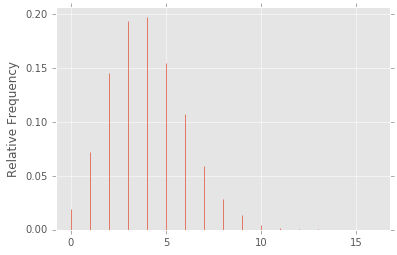

In [25]:
X, Y = RV(Poisson(lam = 2.3) * Poisson(lam = 1.7))
Z = X + Y
Z.sim(10000).plot()

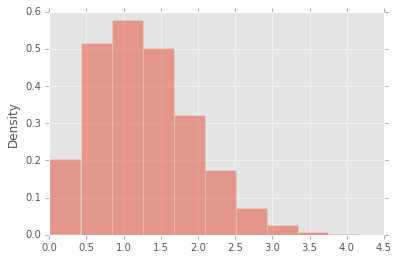

In [26]:
X, Y = RV(Normal(0,1)**2)
Z = sqrt(X**2 + Y**2)
Z.sim(10000).plot()

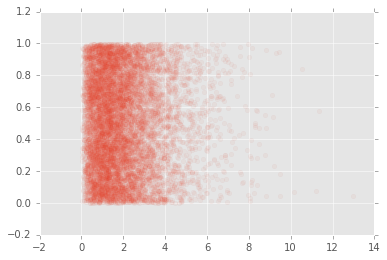

In [27]:
X, Y = RV(Exponential(1)**2)
W = X + Y
Z = X / W
plot((W & Z).sim(10000), alpha = 0.05)

**Caution:** Note that in order to manipulate multiple random variables, they must be defined on the sample probability space.  Otherwise, it would not be possible to determine the *relationship* between the random variables.  For example the following code produces an error.

In [28]:
X = RV(Normal(0,1))
Y = RV(Normal(0,1))
X + Y

Exception: Events must be defined on same probability space.

If it is desired to define two *independent* random variables, the independence must be made explicit in the code, by multiplying probability spaces with `*` or raising a probability space to a power with `**`.

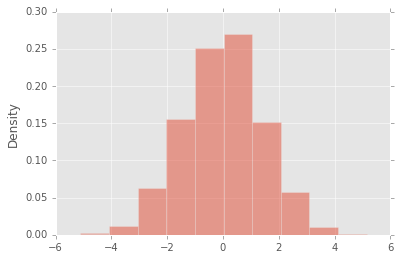

In [29]:
X, Y = RV(Normal(0,1) * Normal(0,1))
(X+Y).sim(10000).plot()

[Back to contents](#contents)